<a href="https://colab.research.google.com/github/anamueller/Modelagem-Computacional/blob/main/Modelo_SIR_em_Redes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório Simulação 6 - Modelo SIR em Redes

#### Ana Clara Mueller Miranda, RA: 148806
#### Bruno Pires Moreira Silva, RA: 139892
#### Jonatas Carrocine, RA: 143472



##1. Introdução

O projeto 6 tem como objetivo desenvolver um modelo epidemiológico, onde apresenta uma população de tamanho fixo e que são categorizados da seguinte forma:


*   S - Suscetíveis
*   I - Infectados
*   R - Recuperados

Por isso esse modelado é chamado de modelo SIR.

Neste caso, serão desenvolvidos mais desse modelos, sendo assim, podemos considerar que vamos desenvolver o modelo epidemiológico de várias regiões e interligá-los, ou seja, um modelo SIR em Rede.

Para cada variável, temos as seguintes EDOs:

$$
\dfrac {dS_{i}}{dt} = -rS(I_{i}+\gamma_{ij}I_{j})
$$

$$
\dfrac {dI_{i}}{dt} = rS(I_{i}+\gamma_{ij}I_{j}) - aI_{i}
$$

$$
\dfrac {dR_{i}}{dt} = aI_{i}
$$

> Nas equações acima, "r" se trata da taxa de infecção, e "a" se trata da taxa de recuperação, enquanto a letra grega gamma é a probabilidade de infectar outras regiões, e "i" e "j" são os números das regiões.

Sendo assim, serão feitas algumas simulações para verificar como se comporta uma epidemia em cada uma das regiões, e verificar se possuem alguma influência sobre outras.

A esquematização da ligação das regioões é dada pelo seguinte grafo:
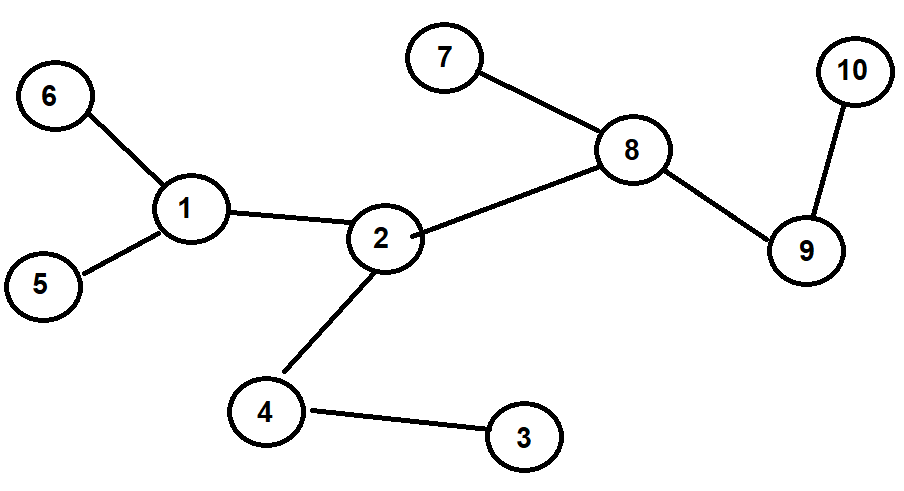

##2. Desenvolvimento

###2.1 Código implementado

Abaixo temos o código implementado, temos na primeira parte o desenvolvimento da nossa classe SIR, que é declarado seus valores iniciais, suas EDOs, e também o grafo da nossa rede.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class SIR:
    def __init__(self,r,S,I,a):
      self.edoS = [S]
      self.edoI = [I]
      self.edoR = [0]

      self.S = S
      self.I = I
      self.R = 0

      self.r = r
      self.a = a


    def dSdt(self,sumI):
      dS = (-self.r*self.S*sumI)
      #print('resultado EDO suscetiveis',dS)
      self.edoS.append(dS+self.S)
      return dS

    def dIdt(self,sumI):
      dI = (self.r*self.S - self.a)*sumI
      #print('resultado EDO Infectados',dI)
      self.edoI.append(dI+self.I)
      return dI

    def dRdt(self,sumI):
      dR = (self.a*sumI)
      #print('Resultado EDO Recuperados',dR)
      self.edoR.append(dR+self.R)
      return dR

    def somatorio(self, vertice, atual,γ,I):
      if atual==1:
        return (vertice.I + γ[0]*I[0] + γ[1]*I[1] + γ[2]*I[2])      #I1 + γ12 * I12 + γ15 * I15 + γ16 * I16 
      if atual==2:
        return (vertice.I + γ[0]*I[0] + γ[1]*I[1] + γ[2]*I[2])      #I2 + γ12 * I12 + γ24 * I24 + γ28 * I28 
      if atual==3: 
        return (vertice.I + γ[0]*I[0])                              #I3 + γ34 * I34
      if atual==4:
        return (vertice.I + γ[0]*I[0] + γ[1]*I[1])                  #I4 + γ43 * I43 + γ24 * I24
      if atual==5:
        return (vertice.I + γ[0]*I[0])                              #I5 + γ15 * I15
      if atual==6:
        return (vertice.I + γ[0]*I[0])                              #I6 + γ16 * I16
      if atual==7:
        return (vertice.I + γ[0]*I[0])                              #I7 + γ78 * I78
      if atual==8:
        return (vertice.I + γ[0]*I[0] + γ[1]*I[1] + γ[2]*I[2])      #I8 + γ82 * I82 + γ78 * I78 + γ89 * I89 
      if atual==9:
        return (vertice.I + γ[0]*I[0] + γ[1]*I[1])                  #I9 + γ98 * I98 + γ910 * I910 
      if atual==10: 
        return (vertice.I + γ[0]*I[0])                              #I10 + γ910 * I910

    def Update(self,S,I,R):
      self.S += S
      self.I += I
      self.R += R
      

Na segunda parte do código, temos a simulação em si dos valores, onde a quantidade de indivíduos suscetíveis, infectados e recuperados vão ser atualizados conforme o tempo.

In [ ]:
time = 100
t = []
values2  = []
values2.append(SIR(0.0009,268, 2,0.04))           #vértice 1
values2.append(SIR(0.0009,178, 2,0.06))           #vértice 2
values2.append(SIR(0.0009,339, 2,0.075))          #vértice 3
values2.append(SIR(0.0009,603, 2,0.05))           #vértice 4
values2.append(SIR(0.0009,540, 2,0.03))           #vértice 5
values2.append(SIR(0.0009,423, 2,0.08))           #vértice 6
values2.append(SIR(0.0009,590, 2,0.1))            #vértice 7
values2.append(SIR(0.0009,198, 2,0.09))           #vértice 8
values2.append(SIR(0.0009,294, 2,0.015))          #vértice 9
values2.append(SIR(0.0009,498, 2,0.025))          #vértice 10

for i in range (0,time):
  t.append(i)
  sum = values2[0].somatorio(values2[0], 1,[1,1,1],[1,1,1]) 
  values2[0].Update(values2[0].dSdt(sum),values2[0].dIdt(sum),values2[0].dRdt(sum))
  
  sum = values2[1].somatorio(values2[1], 2,[1,1,1],[1,1,1])
  values2[1].Update(values2[1].dSdt(sum),values2[1].dIdt(sum),values2[1].dRdt(sum))
  
  sum = values2[2].somatorio(values2[2], 3,[1,1,1],[1,1,1])
  values2[2].Update(values2[2].dSdt(sum),values2[2].dIdt(sum),values2[2].dRdt(sum))
  
  sum = values2[3].somatorio(values2[3], 4,[1,1,1],[1,1,1])
  values2[3].Update(values2[3].dSdt(sum),values2[3].dIdt(sum),values2[3].dRdt(sum))
  
  sum = values2[4].somatorio(values2[4], 5,[1,1,1],[1,1,1])
  values2[4].Update(values2[4].dSdt(sum),values2[4].dIdt(sum),values2[4].dRdt(sum))
  
  sum = values2[5].somatorio(values2[5], 6,[1,1,1],[1,1,1])
  values2[5].Update(values2[5].dSdt(sum),values2[5].dIdt(sum),values2[5].dRdt(sum))
  
  sum = values2[6].somatorio(values2[6], 7,[1,1,1],[1,1,1])
  values2[6].Update(values2[6].dSdt(sum),values2[6].dIdt(sum),values2[6].dRdt(sum))
  
  sum = values2[7].somatorio(values2[7], 8,[1,1,1],[1,1,1])
  values2[7].Update(values2[7].dSdt(sum),values2[7].dIdt(sum),values2[7].dRdt(sum))
  
  sum = values2[8].somatorio(values2[0], 9,[1,1,1],[1,1,1])
  values2[8].Update(values2[8].dSdt(sum),values2[8].dIdt(sum),values2[8].dRdt(sum))
  
  sum = values2[9].somatorio(values2[9], 10,[1,1,1],[1,1,1])
  values2[9].Update(values2[9].dSdt(sum),values2[9].dIdt(sum),values2[9].dRdt(sum))

##3. Resultados

###3.1 Simulação usando um modelo determinístico

Realizando a simulação, utilizando taxas constantes, temos os seguintes gráficos de pessoas Suscetíveis, Infectadas e Recuperadas:

In [ ]:
values2[0].edoS

Pessoas suscetíveis em cada região:

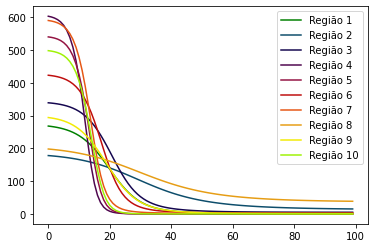

In [ ]:
  plt.plot(t, values2[0].edoS[0:100],color='#008000')
  plt.plot(t, values2[1].edoS[0:100],color='#0d4d6b')
  plt.plot(t, values2[2].edoS[0:100],color='#14064f')
  plt.plot(t, values2[3].edoS[0:100],color='#4f064e')
  plt.plot(t, values2[4].edoS[0:100],color='#941342')
  plt.plot(t, values2[5].edoS[0:100],color='#bf0d0d')
  plt.plot(t, values2[6].edoS[0:100],color='#e65715')
  plt.plot(t, values2[7].edoS[0:100],color='#e69d15')
  plt.plot(t, values2[8].edoS[0:100],color='#f2ea05')
  plt.plot(t, values2[9].edoS[0:100],color='#9ff205')


  plt.legend(["Região 1", "Região 2", "Região 3", "Região 4", "Região 5", "Região 6",
              "Região 7","Região 8","Região 9","Região 10"])
  plt.show()

Pessoas infectadas em cada região:

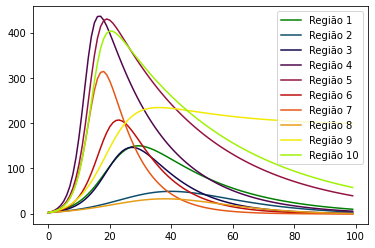

In [ ]:
plt.plot(t, values2[0].edoI[0:100],color='#008000')
plt.plot(t, values2[1].edoI[0:100],color='#0d4d6b')
plt.plot(t, values2[2].edoI[0:100],color='#14064f')
plt.plot(t, values2[3].edoI[0:100],color='#4f064e')
plt.plot(t, values2[4].edoI[0:100],color='#941342')
plt.plot(t, values2[5].edoI[0:100],color='#bf0d0d')
plt.plot(t, values2[6].edoI[0:100],color='#e65715')
plt.plot(t, values2[7].edoI[0:100],color='#e69d15')
plt.plot(t, values2[8].edoI[0:100],color='#f2ea05')
plt.plot(t, values2[9].edoI[0:100],color='#9ff205')

  
plt.legend(["Região 1", "Região 2", "Região 3", "Região 4", "Região 5", "Região 6",
              "Região 7","Região 8","Região 9","Região 10"])
  
plt.show()

Pessoas recuperadas em cada região:

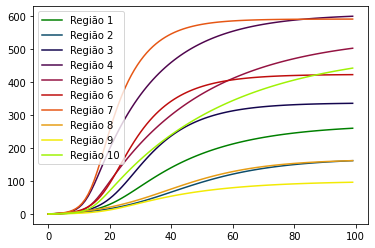

In [ ]:
  plt.plot(t, values2[0].edoR[0:100],color='#008000')
  plt.plot(t, values2[1].edoR[0:100],color='#0d4d6b')
  plt.plot(t, values2[2].edoR[0:100],color='#14064f')
  plt.plot(t, values2[3].edoR[0:100],color='#4f064e')
  plt.plot(t, values2[4].edoR[0:100],color='#941342')
  plt.plot(t, values2[5].edoR[0:100],color='#bf0d0d')
  plt.plot(t, values2[6].edoR[0:100],color='#e65715')
  plt.plot(t, values2[7].edoR[0:100],color='#e69d15')
  plt.plot(t, values2[8].edoR[0:100],color='#f2ea05')
  plt.plot(t, values2[9].edoR[0:100],color='#9ff205')

plt.legend(["Região 1", "Região 2", "Região 3", "Região 4", "Região 5", "Região 6",
              "Região 7","Região 8","Região 9","Região 10"])

plt.show()

Como podemos observar, a maioria das regiões acompanha as outras em quase todas as faixas de suscetíveis, infectados e recuperados.

###3.2 Simulações usando um modelo estocástico



Por conta da simulação apresentar populações pequenas, não é totalmente visível perceber algumas diferenças das linhas SIR usando probabilidades próximas de 100%, logo será atribuído um multiplicador bem maior comparado as outras regiões.

Na seguinte simulação, as conexões entre regiões 1-5 e 2-4 terão uma probabilidade muito maior em infecções, por terem um maior movimento de pessoas, supondo essa condição.

In [ ]:
time = 100
t = []
values2  = []
values2.append(SIR(0.0009,268, 2,0.04))           #vértice 1
values2.append(SIR(0.0009,178, 2,0.06))           #vértice 2
values2.append(SIR(0.0009,339, 2,0.075))          #vértice 3
values2.append(SIR(0.0009,603, 2,0.05))           #vértice 4
values2.append(SIR(0.0009,540, 2,0.03))           #vértice 5
values2.append(SIR(0.0009,423, 2,0.08))           #vértice 6
values2.append(SIR(0.0009,590, 2,0.1))            #vértice 7
values2.append(SIR(0.0009,198, 2,0.09))           #vértice 8
values2.append(SIR(0.0009,294, 2,0.015))          #vértice 9
values2.append(SIR(0.0009,498, 2,0.025))          #vértice 10

# a primeira lista que está passando pro somatório são os valores de γ que estão multiplicando cada
# ligação (I, a segunda lista) do grafo. Pra probablidade, dá pra fazer os produtos dentro das próprias listas que tá passando 
# por exemplo, supondo q a prob12 seja 50%, a prob15 60% e a prob16 75%: values2[0].somatorio(values2[0], 1,[1*0.5,1*0.6,1*0.75ax],[1,1,1]) 

for i in range (0,time):
  t.append(i)
  sum = values2[0].somatorio(values2[0], 1,[1*0.8,1*5,1*4],[1,1,1]) 
  values2[0].Update(values2[0].dSdt(sum),values2[0].dIdt(sum),values2[0].dRdt(sum))
  
  sum = values2[1].somatorio(values2[1], 2,[1*0.8,1*6,1*0.9],[1,1,1])
  values2[1].Update(values2[1].dSdt(sum),values2[1].dIdt(sum),values2[1].dRdt(sum))
  
  sum = values2[2].somatorio(values2[2], 3,[1*0.4,1,1],[1,1,1])
  values2[2].Update(values2[2].dSdt(sum),values2[2].dIdt(sum),values2[2].dRdt(sum))
  
  sum = values2[3].somatorio(values2[3], 4,[1*0.75,1*6,1],[1,1,1])
  values2[3].Update(values2[3].dSdt(sum),values2[3].dIdt(sum),values2[3].dRdt(sum))
  
  sum = values2[4].somatorio(values2[4], 5,[1*5,1,1],[1,1,1])
  values2[4].Update(values2[4].dSdt(sum),values2[4].dIdt(sum),values2[4].dRdt(sum))
  
  sum = values2[5].somatorio(values2[5], 6,[1*0.7,1,1],[1,1,1])
  values2[5].Update(values2[5].dSdt(sum),values2[5].dIdt(sum),values2[5].dRdt(sum))
  
  sum = values2[6].somatorio(values2[6], 7,[1*0.5,1,1],[1,1,1])
  values2[6].Update(values2[6].dSdt(sum),values2[6].dIdt(sum),values2[6].dRdt(sum))
  
  sum = values2[7].somatorio(values2[7], 8,[1*0.9,1*1.1,1*0.5],[1,1,1])
  values2[7].Update(values2[7].dSdt(sum),values2[7].dIdt(sum),values2[7].dRdt(sum))
  
  sum = values2[8].somatorio(values2[0], 9,[1*1.8,1*1.25,1],[1,1,1])
  values2[8].Update(values2[8].dSdt(sum),values2[8].dIdt(sum),values2[8].dRdt(sum))
  
  sum = values2[9].somatorio(values2[9], 10,[1*0.75,1,1],[1,1,1])
  values2[9].Update(values2[9].dSdt(sum),values2[9].dIdt(sum),values2[9].dRdt(sum))

Pessoas suscetíveis:

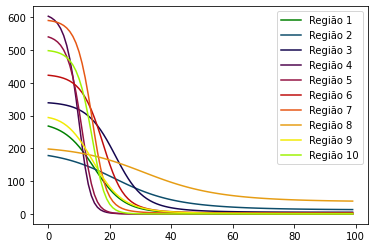

In [ ]:
  plt.plot(t, values2[0].edoS[0:100],color='#008000')
  plt.plot(t, values2[1].edoS[0:100],color='#0d4d6b')
  plt.plot(t, values2[2].edoS[0:100],color='#14064f')
  plt.plot(t, values2[3].edoS[0:100],color='#4f064e')
  plt.plot(t, values2[4].edoS[0:100],color='#941342')
  plt.plot(t, values2[5].edoS[0:100],color='#bf0d0d')
  plt.plot(t, values2[6].edoS[0:100],color='#e65715')
  plt.plot(t, values2[7].edoS[0:100],color='#e69d15')
  plt.plot(t, values2[8].edoS[0:100],color='#f2ea05')
  plt.plot(t, values2[9].edoS[0:100],color='#9ff205')


  plt.legend(["Região 1", "Região 2", "Região 3", "Região 4", "Região 5", "Região 6",
              "Região 7","Região 8","Região 9","Região 10"])
  plt.show()

Pessoas infectadas:

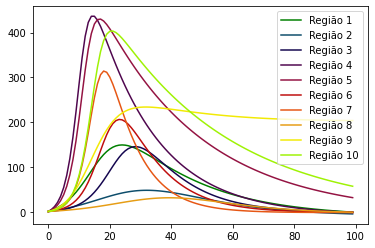

In [ ]:
plt.plot(t, values2[0].edoI[0:100],color='#008000')
plt.plot(t, values2[1].edoI[0:100],color='#0d4d6b')
plt.plot(t, values2[2].edoI[0:100],color='#14064f')
plt.plot(t, values2[3].edoI[0:100],color='#4f064e')
plt.plot(t, values2[4].edoI[0:100],color='#941342')
plt.plot(t, values2[5].edoI[0:100],color='#bf0d0d')
plt.plot(t, values2[6].edoI[0:100],color='#e65715')
plt.plot(t, values2[7].edoI[0:100],color='#e69d15')
plt.plot(t, values2[8].edoI[0:100],color='#f2ea05')
plt.plot(t, values2[9].edoI[0:100],color='#9ff205')

  
plt.legend(["Região 1", "Região 2", "Região 3", "Região 4", "Região 5", "Região 6",
              "Região 7","Região 8","Região 9","Região 10"])
  
plt.show()

Pessoas Recuperadas:

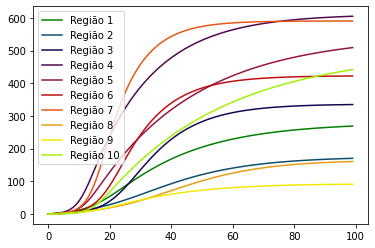

In [ ]:
  plt.plot(t, values2[0].edoR[0:100],color='#008000')
  plt.plot(t, values2[1].edoR[0:100],color='#0d4d6b')
  plt.plot(t, values2[2].edoR[0:100],color='#14064f')
  plt.plot(t, values2[3].edoR[0:100],color='#4f064e')
  plt.plot(t, values2[4].edoR[0:100],color='#941342')
  plt.plot(t, values2[5].edoR[0:100],color='#bf0d0d')
  plt.plot(t, values2[6].edoR[0:100],color='#e65715')
  plt.plot(t, values2[7].edoR[0:100],color='#e69d15')
  plt.plot(t, values2[8].edoR[0:100],color='#f2ea05')
  plt.plot(t, values2[9].edoR[0:100],color='#9ff205')

plt.legend(["Região 1", "Região 2", "Região 3", "Região 4", "Região 5", "Região 6",
              "Região 7","Região 8","Região 9","Região 10"])

plt.show()

Neste caso, como as probabilidades de infecção são muito altas entre as regiões 1 e 5, e 2 e 4, a quantidade de pessoas suscetíveis diminui um pouco mais rápido, em comparação com o do gráfico determinístico.

No gráfico de pessoas suscetíveis, as regiões 4 e 5, de maiores populações, os valores caem mais rápido que os demais, e ao mesmo tempo, os seus ápices de pessoas contaminadas ocorre um pouco antes do que no modelo determinístico. E no gráfico de pessoas recuperadas, tais valores são um pouco maiores do que no outro modelo, logo podemos concluir que em regiões de acoplamento de maior contaminação, aumenta a quantidade de contaminados precocemente.

Abaixo temos mais uma simulação:


In [ ]:
time = 100
t = []
values2  = []
values2.append(SIR(0.0009,677, 2,0.04))           #vértice 1
values2.append(SIR(0.0009,172, 2,0.06))           #vértice 2
values2.append(SIR(0.0009,237, 2,0.075))          #vértice 3
values2.append(SIR(0.0009,560, 2,0.05))           #vértice 4
values2.append(SIR(0.0009,425, 2,0.03))           #vértice 5
values2.append(SIR(0.0009,390, 2,0.08))           #vértice 6
values2.append(SIR(0.0009,126, 2,0.1))            #vértice 7
values2.append(SIR(0.0009,200, 2,0.09))           #vértice 8
values2.append(SIR(0.0009,497, 2,0.015))          #vértice 9
values2.append(SIR(0.0009,578, 2,0.025))          #vértice 10

# a primeira lista que está passando pro somatório são os valores de γ que estão multiplicando cada
# ligação (I, a segunda lista) do grafo. Pra probablidade, dá pra fazer os produtos dentro das próprias listas que tá passando 
# por exemplo, supondo q a prob12 seja 50%, a prob15 60% e a prob16 75%: values2[0].somatorio(values2[0], 1,[1*0.5,1*0.6,1*0.75ax],[1,1,1]) 

for i in range (0,time):
  t.append(i)
  sum = values2[0].somatorio(values2[0], 1,[1*0.8,1*5,1*4],[1,1,1]) 
  values2[0].Update(values2[0].dSdt(sum),values2[0].dIdt(sum),values2[0].dRdt(sum))
  
  sum = values2[1].somatorio(values2[1], 2,[1*0.8,1*6,1*0.9],[1,1,1])
  values2[1].Update(values2[1].dSdt(sum),values2[1].dIdt(sum),values2[1].dRdt(sum))
  
  sum = values2[2].somatorio(values2[2], 3,[1*0.4,1,1],[1,1,1])
  values2[2].Update(values2[2].dSdt(sum),values2[2].dIdt(sum),values2[2].dRdt(sum))
  
  sum = values2[3].somatorio(values2[3], 4,[1*0.75,1*6,1],[1,1,1])
  values2[3].Update(values2[3].dSdt(sum),values2[3].dIdt(sum),values2[3].dRdt(sum))
  
  sum = values2[4].somatorio(values2[4], 5,[1*5,1,1],[1,1,1])
  values2[4].Update(values2[4].dSdt(sum),values2[4].dIdt(sum),values2[4].dRdt(sum))
  
  sum = values2[5].somatorio(values2[5], 6,[1*0.7,1,1],[1,1,1])
  values2[5].Update(values2[5].dSdt(sum),values2[5].dIdt(sum),values2[5].dRdt(sum))
  
  sum = values2[6].somatorio(values2[6], 7,[1*0.5,1,1],[1,1,1])
  values2[6].Update(values2[6].dSdt(sum),values2[6].dIdt(sum),values2[6].dRdt(sum))
  
  sum = values2[7].somatorio(values2[7], 8,[1*0.9,1*1.1,1*0.5],[1,1,1])
  values2[7].Update(values2[7].dSdt(sum),values2[7].dIdt(sum),values2[7].dRdt(sum))
  
  sum = values2[8].somatorio(values2[0], 9,[1*1.8,1*1.25,1],[1,1,1])
  values2[8].Update(values2[8].dSdt(sum),values2[8].dIdt(sum),values2[8].dRdt(sum))
  
  sum = values2[9].somatorio(values2[9], 10,[1*0.75,1,1],[1,1,1])
  values2[9].Update(values2[9].dSdt(sum),values2[9].dIdt(sum),values2[9].dRdt(sum))

NameError: ignored

Pessoas Suscetíveis:

In [ ]:
plt.plot(t, values2[0].edoS[0:100],color='#008000')
plt.plot(t, values2[1].edoS[0:100],color='#0d4d6b')
plt.plot(t, values2[2].edoS[0:100],color='#14064f')
plt.plot(t, values2[3].edoS[0:100],color='#4f064e')
plt.plot(t, values2[4].edoS[0:100],color='#941342')
plt.plot(t, values2[5].edoS[0:100],color='#bf0d0d')
plt.plot(t, values2[6].edoS[0:100],color='#e65715')
plt.plot(t, values2[7].edoS[0:100],color='#e69d15')
plt.plot(t, values2[8].edoS[0:100],color='#f2ea05')
plt.plot(t, values2[9].edoS[0:100],color='#9ff205')


plt.legend(["Região 1", "Região 2", "Região 3", "Região 4", "Região 5", "Região 6",
              "Região 7","Região 8","Região 9","Região 10"])
plt.show()

Pessoas Infectadas:

In [ ]:
plt.plot(t, values2[0].edoI[0:100],color='#008000')
plt.plot(t, values2[1].edoI[0:100],color='#0d4d6b')
plt.plot(t, values2[2].edoI[0:100],color='#14064f')
plt.plot(t, values2[3].edoI[0:100],color='#4f064e')
plt.plot(t, values2[4].edoI[0:100],color='#941342')
plt.plot(t, values2[5].edoI[0:100],color='#bf0d0d')
plt.plot(t, values2[6].edoI[0:100],color='#e65715')
plt.plot(t, values2[7].edoI[0:100],color='#e69d15')
plt.plot(t, values2[8].edoI[0:100],color='#f2ea05')
plt.plot(t, values2[9].edoI[0:100],color='#9ff205')

  
plt.legend(["Região 1", "Região 2", "Região 3", "Região 4", "Região 5", "Região 6",
              "Região 7","Região 8","Região 9","Região 10"])
  
plt.show()

NameError: ignored

Pessoas recuperadas:

In [ ]:
plt.plot(t, values2[0].edoR[0:100],color='#008000')
plt.plot(t, values2[1].edoR[0:100],color='#0d4d6b')
plt.plot(t, values2[2].edoR[0:100],color='#14064f')
plt.plot(t, values2[3].edoR[0:100],color='#4f064e')
plt.plot(t, values2[4].edoR[0:100],color='#941342')
plt.plot(t, values2[5].edoR[0:100],color='#bf0d0d')
plt.plot(t, values2[6].edoR[0:100],color='#e65715')
plt.plot(t, values2[7].edoR[0:100],color='#e69d15')
plt.plot(t, values2[8].edoR[0:100],color='#f2ea05')
plt.plot(t, values2[9].edoR[0:100],color='#9ff205')

plt.legend(["Região 1", "Região 2", "Região 3", "Região 4", "Região 5", "Região 6",
              "Região 7","Região 8","Região 9","Região 10"])

plt.show()